# Exercícios MLP

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (8, 8)

# Exercicio 1
Treine um perceptron para classificar os dados convertidos em coordenadas polares dos slides anteriores.

In [29]:
r = np.random.uniform([[0], [2]], [[1], [3]], size=(2, 100))
angle = np.linspace(0, 2 * np.pi , 100 )

X = np.array([r[0] * np.cos(angle), r[1] * np.cos(angle)])
Y = np.array([r[0] * np.sin(angle), r[1] * np.sin(angle)])
R = np.sqrt(np.power(X, 2) + np.power(Y, 2))
O = np.arctan(Y / X)

red = np.array([list(item) + [1] for item in zip(R[0], O[0])])
blue = np.array([list(item) + [-1] for item in zip(R[1], O[1])])

vectors = np.concatenate((red, blue))
np.random.seed(42)
np.random.shuffle(vectors) 

train, test = train_test_split(vectors, test_size=0.3)

In [30]:
classifier = Perceptron(eta0 = 0.05)
classifier.fit(train[:,[0,1]], train[:,2])

predictions = classifier.predict(test[:, [0, 1]])

accuracy = accuracy_score(test[:, 2], predictions)
cm = confusion_matrix(test[:, 2], predictions)

print(accuracy)
print(cm)

1.0
[[32  0]
 [ 0 28]]


## Fazendo com um perceptrom na mao

In [31]:
from IPython.display import clear_output

In [36]:
def print_plane(vectors, w, bias):
  clear_output(wait=True)
  plt.figure()

  plt.xlim(-1, 4)
  plt.ylim(-2, 2)

  x_hiperplan = np.array([-1,4])
  y_hiperplan = (((x_hiperplan *  -1*w[0]) - bias )/w[1]) #cuidado, pode dar divisão por zero!
  plt.plot(x_hiperplan, y_hiperplan, color='orange')
  plt.quiver(0,0, w[0], w[1], color=['b'], angles='xy', scale_units='xy', scale=1)

  for x in vectors:
    if x[2] == -1: #Iris Setosa
      plt.plot(x[0], x[1], 'o', color='red')
    else: #Iris Versicolour
      plt.plot(x[0], x[1], '+', color='blue')
      
  plt.show()

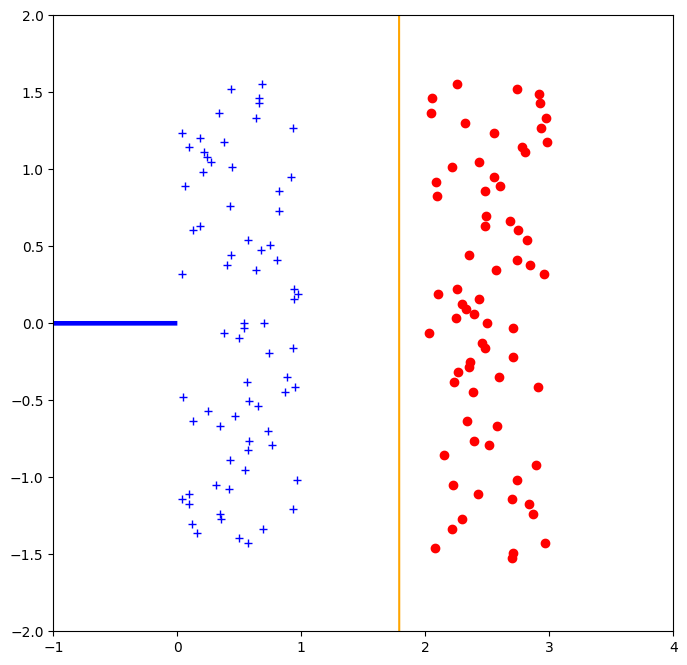

Epoca: 2
Epocas necessarias: 2
Resultado final: 
[ 2.50000000e+00 -1.39755144e+00 -4.02337494e-04]


In [38]:
w = np.array([1.0,1.0,-1.0])
eta = 0.5

allOk = False
count, epochs = 0, 15
while count < epochs and not allOk:
    print(f"Epoca: {count + 1}")

    allOk = True
    for x in train:
        bias_input = np.array([1, x[0], x[1]])
        result = w.dot(bias_input)
        result = 1 if result >= 0 else -1

        if result != x[2]:
            w += (eta * x[2] * bias_input)
            allOk = False
            print_plane(train, w[1:3], w[0])
    
    count += 1

print(f"Epocas necessarias: {count}")
print("Resultado final: ")
print(w)